# Feature Extractor

In [1]:
import tensorflow as tf
tf.random.set_seed(221)

import matplotlib.pyplot as plt
from PIL import Image
import torch

extract_feature = True

Pickle

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

Resnet18

In [3]:
if extract_feature:
    import timm

    model = timm.create_model(
        'vgg19.tv_in1k',
        pretrained=True,
        num_classes=0,  # remove classifier nn.Linear
    )
    model = model.eval()

    # get model specific transforms (normalization, resize)
    data_config = timm.data.resolve_model_data_config(model)
    transforms = timm.data.create_transform(**data_config, is_training=False)


Test print image from Cifar 10

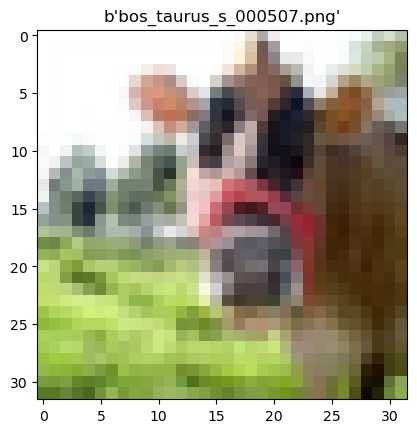

In [4]:
if extract_feature:
    test = unpickle('E:/Work/DS/Datasets/Raw/cifar-100-python/train')

    img = test[b'data'][0].reshape((3,32,32)).transpose(1,2,0).astype("uint8") # cow???
    label = test[b'filenames'][0]
    plt.imshow(img)
    plt.title(label)
    plt.show()

Load CIFAR 10

Process images from the cifar10 for the unwrapper

In [5]:
def process_minibatch(minibatch):
    batch_data = []
    for image in minibatch:
        # Convert to PIL image format
        img = Image.fromarray(image.reshape(3,32,32).transpose(1,2,0))
        # transform to model format and stack
        img = transforms(img)
        batch_data.append(img)
    batch_data = torch.stack(batch_data)
    # run through the resnet
    processed_data = model(batch_data)
    return processed_data

In [6]:
def feature_extraction(file, is_train = False):

    output_df = pd.DataFrame(columns=['Class'])

    MINIBATCH_SIZE = 200


    for k,batch in enumerate(file):
        print('processing batch', k+1)
        # get images
        images = batch[b'data']
        labels = batch[b'fine_labels']
        # Convert the list of images to a batch tensor
        if is_train:
            NUMBER_MINIBATCH = 50000/MINIBATCH_SIZE
        else:
            NUMBER_MINIBATCH = 10000/MINIBATCH_SIZE
        for i in range(0,int(NUMBER_MINIBATCH)):
            print('processing minibatch %d out of %d' %(i+1 , int(NUMBER_MINIBATCH)))
            minibatch = images[i*MINIBATCH_SIZE:(i+1)*MINIBATCH_SIZE]

            # get features and put into df format
            minibatch_output = process_minibatch(minibatch)
            minibatch_output_df = pd.DataFrame(minibatch_output.detach().numpy(), columns=[f'features_{i}' for i in range(4096)])
            minibatch_output_df['Class'] = labels[i*MINIBATCH_SIZE:(i+1)*MINIBATCH_SIZE]

            output_df = pd.concat([output_df, minibatch_output_df], ignore_index=True)
    return output_df

In [7]:
import pandas as pd
if extract_feature:
    cifar100 = [unpickle('E:/Work/DS/Datasets/Raw/cifar-100-python/train')]
    train = feature_extraction(cifar100, is_train = True)
    train.to_csv('extracted_features_train.csv', index = False)
else:
    train = pd.read_csv('extracted_features_train.csv')


processing batch 1
processing minibatch 1 out of 250
processing minibatch 2 out of 250
processing minibatch 3 out of 250
processing minibatch 4 out of 250
processing minibatch 5 out of 250
processing minibatch 6 out of 250
processing minibatch 7 out of 250
processing minibatch 8 out of 250
processing minibatch 9 out of 250
processing minibatch 10 out of 250
processing minibatch 11 out of 250
processing minibatch 12 out of 250
processing minibatch 13 out of 250
processing minibatch 14 out of 250
processing minibatch 15 out of 250
processing minibatch 16 out of 250
processing minibatch 17 out of 250
processing minibatch 18 out of 250
processing minibatch 19 out of 250
processing minibatch 20 out of 250
processing minibatch 21 out of 250
processing minibatch 22 out of 250
processing minibatch 23 out of 250
processing minibatch 24 out of 250
processing minibatch 25 out of 250
processing minibatch 26 out of 250
processing minibatch 27 out of 250
processing minibatch 28 out of 250
processing

In [8]:
print(train.head())
print(train.shape)

  Class  features_0  features_1  features_2  features_3  features_4  \
0    19    0.184726     1.71737         0.0    4.866918    0.000000   
1    29    0.000000     0.00000         0.0    3.010815    1.921054   
2     0    0.000000     0.00000         0.0    3.359219    0.000000   
3    11    0.000000     0.00000         0.0    3.758401    0.000000   
4     1    0.000000     0.00000         0.0    3.980873    0.000000   

   features_5  features_6  features_7  features_8  ...  features_4086  \
0    0.000000    0.174963    0.000000    0.180414  ...            0.0   
1    0.000000    0.237502    0.480713    0.000000  ...            0.0   
2    0.458951    0.000000    1.304626    0.000000  ...            0.0   
3    1.109995    0.000000    0.708492    0.000000  ...            0.0   
4    0.251120    0.688527    0.000000    0.000000  ...            0.0   

   features_4087  features_4088  features_4089  features_4090  features_4091  \
0       0.000000       0.366237       0.000000       1

Do the same for test set

In [9]:
if extract_feature:
    cifar100_test = [unpickle('E:/Work/DS/Datasets/Raw/cifar-100-python/test')]
    test = feature_extraction(cifar100_test)
    test.to_csv('extracted_features_test.csv', index = False)
else:
    test = pd.read_csv('extracted_features_test.csv')

processing batch 1
processing minibatch 1 out of 50
processing minibatch 2 out of 50
processing minibatch 3 out of 50
processing minibatch 4 out of 50
processing minibatch 5 out of 50
processing minibatch 6 out of 50
processing minibatch 7 out of 50
processing minibatch 8 out of 50
processing minibatch 9 out of 50
processing minibatch 10 out of 50
processing minibatch 11 out of 50
processing minibatch 12 out of 50
processing minibatch 13 out of 50
processing minibatch 14 out of 50
processing minibatch 15 out of 50
processing minibatch 16 out of 50
processing minibatch 17 out of 50
processing minibatch 18 out of 50
processing minibatch 19 out of 50
processing minibatch 20 out of 50
processing minibatch 21 out of 50
processing minibatch 22 out of 50
processing minibatch 23 out of 50
processing minibatch 24 out of 50
processing minibatch 25 out of 50
processing minibatch 26 out of 50
processing minibatch 27 out of 50
processing minibatch 28 out of 50
processing minibatch 29 out of 50
proc

In [10]:
print(test.head())
print(test.shape)

  Class  features_0  features_1  features_2  features_3  features_4  \
0    49    0.648974    0.490222         0.0    4.811389         0.0   
1    33    0.165886    0.000000         0.0    4.052351         0.0   
2    72    0.000000    0.481742         0.0    5.241817         0.0   
3    51    0.000000    0.000000         0.0    4.051072         0.0   
4    71    0.000000    0.000000         0.0    3.203792         0.0   

   features_5  features_6  features_7  features_8  ...  features_4086  \
0     0.00000    0.000000    0.046998         0.0  ...            0.0   
1     0.09755    0.000000    0.000000         0.0  ...            0.0   
2     0.00000    0.317117    0.000000         0.0  ...            0.0   
3     0.12837    0.000000    0.000000         0.0  ...            0.0   
4     0.00000    0.000000    0.390322         0.0  ...            0.0   

   features_4087  features_4088  features_4089  features_4090  features_4091  \
0            0.0       1.246985       0.864302        